In [1]:
# Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using python

In [4]:
pip install tweepy

     ---------------------------------------- 94.4/94.4 KB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\monak\anaconda3\envs\blhl\python.exe -m pip install --upgrade pip' command.


In [6]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
#Get the keys data
log = pd.read_csv('Login.csv')

In [8]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [11]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [18]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name ="BillGates", count= 100, lang ="en", tweet_mode="extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets : \n")
i= 1
for tweet in posts[0:5]:
    print(str(i)+ ') '+ tweet.full_text +'\n')
    i=i+1

Unexpected parameter: lang


Show the 5 recent tweets : 

1) Not long ago, the world increased aid for global health during a time of crisis. We must do so again. https://t.co/zAOZ1tbKcw

2) .@PardisSabeti is working to detect pathogens earlier and stop pandemics in the their tracks. https://t.co/g9ejMe3O2B

3) Movies like Outbreak nailed it when they imagined a global disease-fighting team who is ready to respond to a crisis on a moment’s notice. Now we need to make it a reality. https://t.co/Yn22HFLMwx

4) Ruth’s discovery of rotavirus saved millions of lives. And learning about rota is what inspired us to launch @GatesFoundation. Ruth was a real hero. https://t.co/46MzfU2zDP

5) I had a great time answering questions on @Reddit yesterday about pandemic prevention, climate change, farmland, my cell phone, and much more. Here are some highlights. https://t.co/k1BRX78eta



In [19]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df.head(5)

,Tweets
0,"Not long ago, the world increased aid for glob..."
1,.@PardisSabeti is working to detect pathogens ...
2,Movies like Outbreak nailed it when they imagi...
3,Ruth’s discovery of rotavirus saved millions o...
4,I had a great time answering questions on @Red...


In [23]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)#Remove @motions
    text = re.sub(r'#', '', text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text)#removing RT
    text = re.sub(r'https?:\/\/\S+', '',text)# Remove the hyperlink
    
    return text
#Clean the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,"Not long ago, the world increased aid for glob..."
1,. is working to detect pathogens earlier and s...
2,Movies like Outbreak nailed it when they imagi...
3,Ruth’s discovery of rotavirus saved millions o...
4,I had a great time answering questions on yes...
...,...
95,I’m hopeful that the world can come together t...
96,The goal of no more pandemics ever is ambitiou...
97,I’m more optimistic than ever that we can one ...
98,I believe that COVID-19 can be the last pandem...


#### Polarity refers to the strength of an opinion. It could be positive or negative.
#### Subjectivity refers to the degree to which a person is personally involved in an object.

In [24]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['polarity'] = df['Tweets'].apply(getPolarity)

#Show the new DF with the new columns
df

,Tweets,Subjectivity,polarity
0,"Not long ago, the world increased aid for glob...",0.200000,0.012500
1,. is working to detect pathogens earlier and s...,0.500000,0.000000
2,Movies like Outbreak nailed it when they imagi...,0.250000,0.100000
3,Ruth’s discovery of rotavirus saved millions o...,0.300000,0.200000
4,I had a great time answering questions on yes...,0.625000,0.650000
...,...,...,...
95,I’m hopeful that the world can come together t...,0.316667,0.333333
96,The goal of no more pandemics ever is ambitiou...,0.329167,0.075000
97,I’m more optimistic than ever that we can one ...,0.500000,0.500000
98,I believe that COVID-19 can be the last pandem...,0.033333,0.000000


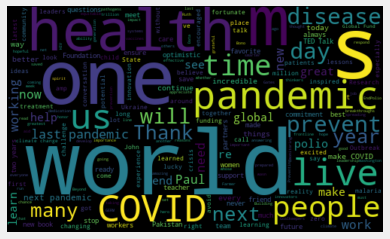

In [26]:
# Plot the Word Cloud
allWords = ' '.join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [28]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,polarity,Analysis
0,"Not long ago, the world increased aid for glob...",0.200000,0.012500,Positive
1,. is working to detect pathogens earlier and s...,0.500000,0.000000,Neutral
2,Movies like Outbreak nailed it when they imagi...,0.250000,0.100000,Positive
3,Ruth’s discovery of rotavirus saved millions o...,0.300000,0.200000,Positive
4,I had a great time answering questions on yes...,0.625000,0.650000,Positive
...,...,...,...,...
95,I’m hopeful that the world can come together t...,0.316667,0.333333,Positive
96,The goal of no more pandemics ever is ambitiou...,0.329167,0.075000,Positive
97,I’m more optimistic than ever that we can one ...,0.500000,0.500000,Positive
98,I believe that COVID-19 can be the last pandem...,0.033333,0.000000,Neutral


In [34]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j+=1

1) Not long ago, the world increased aid for global health during a time of crisis. We must do so again. 

2) Movies like Outbreak nailed it when they imagined a global disease-fighting team who is ready to respond to a crisis on a moment’s notice. Now we need to make it a reality. 

3) Ruth’s discovery of rotavirus saved millions of lives. And learning about rota is what inspired us to launch . Ruth was a real hero. 

4) I had a great time answering questions on  yesterday about pandemic prevention, climate change, farmland, my cell phone, and much more. Here are some highlights. 

5) This warehouse is cool – for many reasons. 

6) I have appreciated our conversations over the years and your perspective about the importance of staying prepared. 

7) It was an honor to speak (virtually) at the GlobalCOVIDSummit today about the urgent action needed to end this pandemic and prevent the next. I'm grateful for the leadership from the US, Belize, Germany, Indonesia and Senegal. 

8) Bono, y

### 73 tweets out of 100 is positive, So it shows that Bill Gates hase mostly Positive sentiment in his tweets.

In [36]:
#Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j+=1

1) To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: 

2) We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: 
EarthDay 

3) Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that COVID will cost nearly $14 trillion. We can save trillions by spending billions. 

4) Changing mindsets is never easy, but Sudha Varghese empowers girls to believe in themselves and see their potential for greatness:  

5) Kakenya Ntaiya founded  to enable girls’ education and end harmful traditional practices like child marriage. Her story is a powerful example of how one person’s act of bravery can spark dramatic change.  

6) : I’ve spent my life working in agriculture, so when I think beyond the humanitarian toll I’m seeing in Ukraine, my focus a…

7) What a devastating 

### 7 out of 100 tweets, The most negative tweets sorted by polarity score

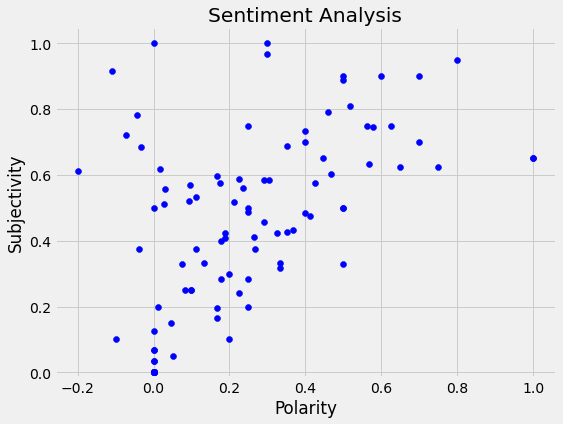

In [38]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [42]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

73.0

In [43]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0])*100, 1)

7.0

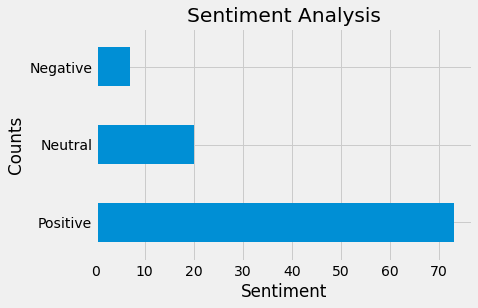

In [51]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='barh')
plt.show()